In [1]:
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('D:/AGTS/Bibliotheques and others/SEABORN/titanic.xls')

In [3]:
cp = data.copy()

In [4]:
cp.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###### Identification des valeurs manquantes

In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
cp.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

##### Traiter les types de valeurs manquantes

In [7]:
missing_values = ['/','n/a','na','--']

## verifier si ces valeurs manquantes non standards sont présentes dans nos données
missing_count = cp.isin(missing_values)
missing_counter = missing_count.sum()
print(missing_counter.sum())

0


In [8]:
### Dans notre data set il n'y pas de valeurs manquantes non standards
## ça signifie que ce que nous avons sont de type stantdards [NaN, NA]
## Nous aurons remplacé : cp = read_excel('data.csv', na_values =missing_values)

In [9]:
cp.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

##### IMPUTATION DES VALEURS, on verifie d'abord l'état des valeurs extrêmes

In [10]:
import matplotlib.pyplot as plt

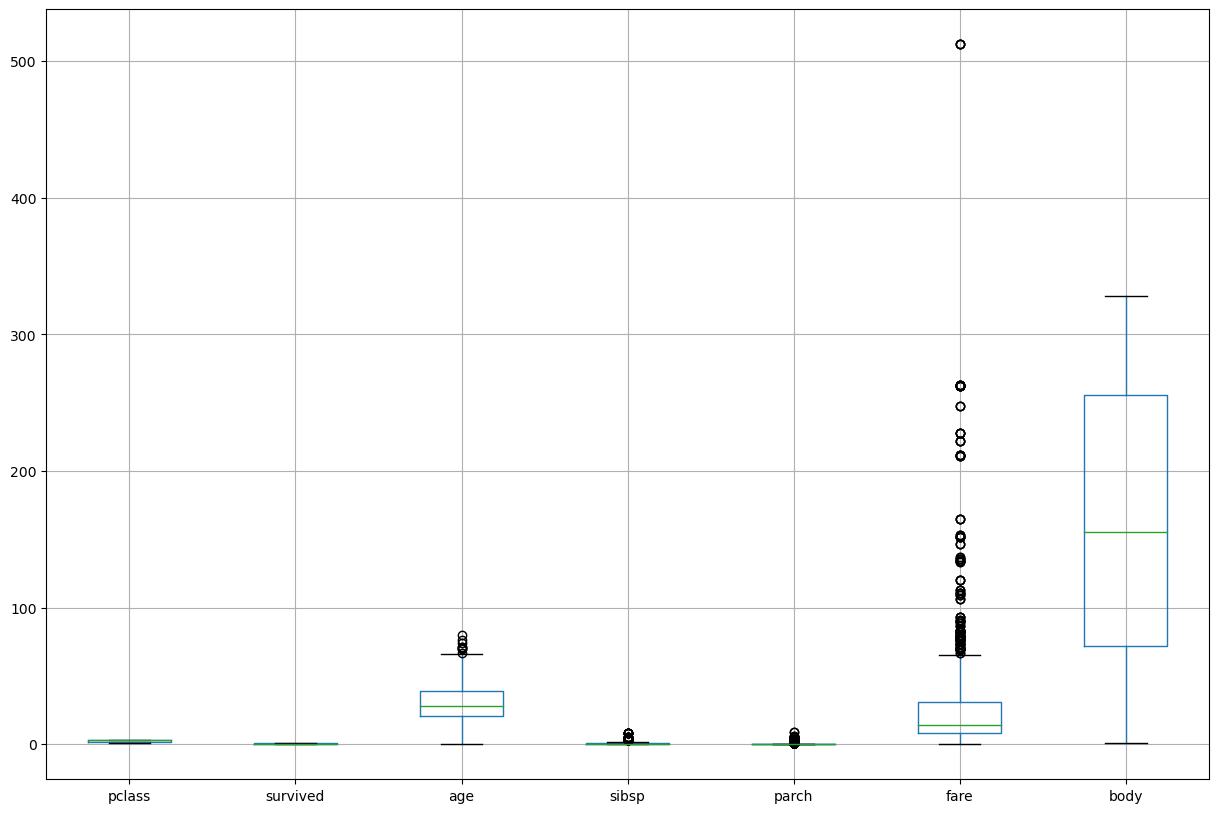

In [11]:
plt.figure(figsize=(15,10))
cp.boxplot()
plt.show()

In [12]:
##Verification du type du champ
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [13]:
## Etant donné, que nous avons des outliers, nous allons proceder l'imputation de valeurs par la médiane.
median = cp['age'].median()
cp['age'].fillna(median, inplace=True)

In [14]:
cp.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [15]:
## valeurs fréquentes DANS CABIN en utilisant scikitlearn
cp['cabin'].fillna(0, inplace=True)

In [16]:
cp.shape

(1309, 14)

In [17]:
from sklearn.impute import SimpleImputer
simpleImputer = SimpleImputer(missing_values=0, strategy='most_frequent')
cp['cabin'] = simpleImputer.fit_transform(cp[['cabin']])

In [18]:
cp.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin           0
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [19]:
## valeurs fréquentes sur BODY 
cp['body'].fillna(0, inplace=True)

In [20]:
from sklearn.impute import SimpleImputer
simpleImputer = SimpleImputer(missing_values=0, strategy='most_frequent')
cp['body'] = simpleImputer.fit_transform(cp[['body']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [21]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       1309 non-null   float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


#### Gestion des valeurs extrêmes

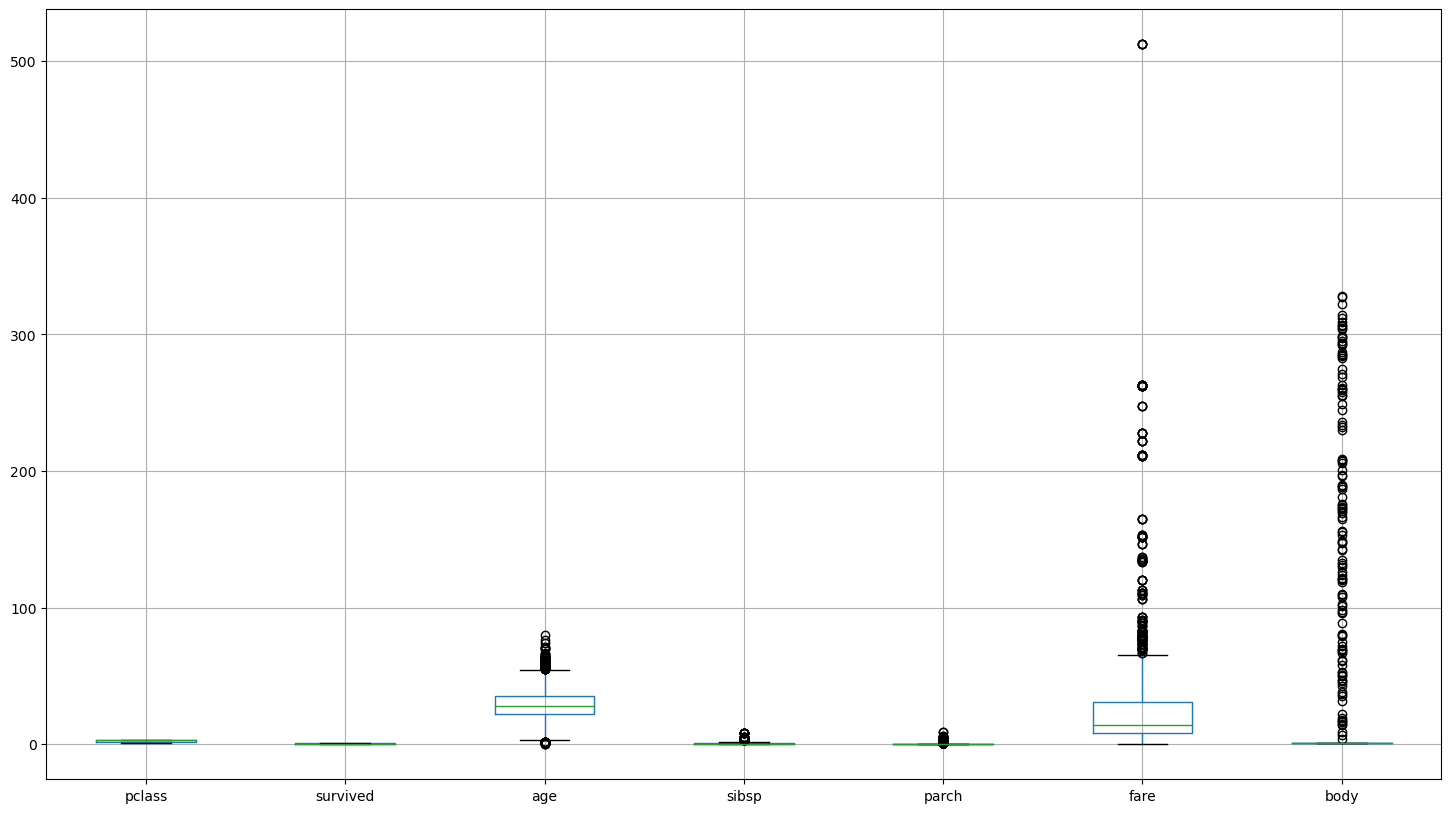

In [22]:
plt.figure(figsize=(18,10))
cp.boxplot()
plt.show()

In [23]:
features = ['pclass','survived','age','sibsp','parch','fare','body']

In [24]:
df = cp.copy()

###### Remplacer les outliers

In [27]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [28]:
for feature in features:
    impute_outliers(df, feature)

In [29]:
dp = df[features]

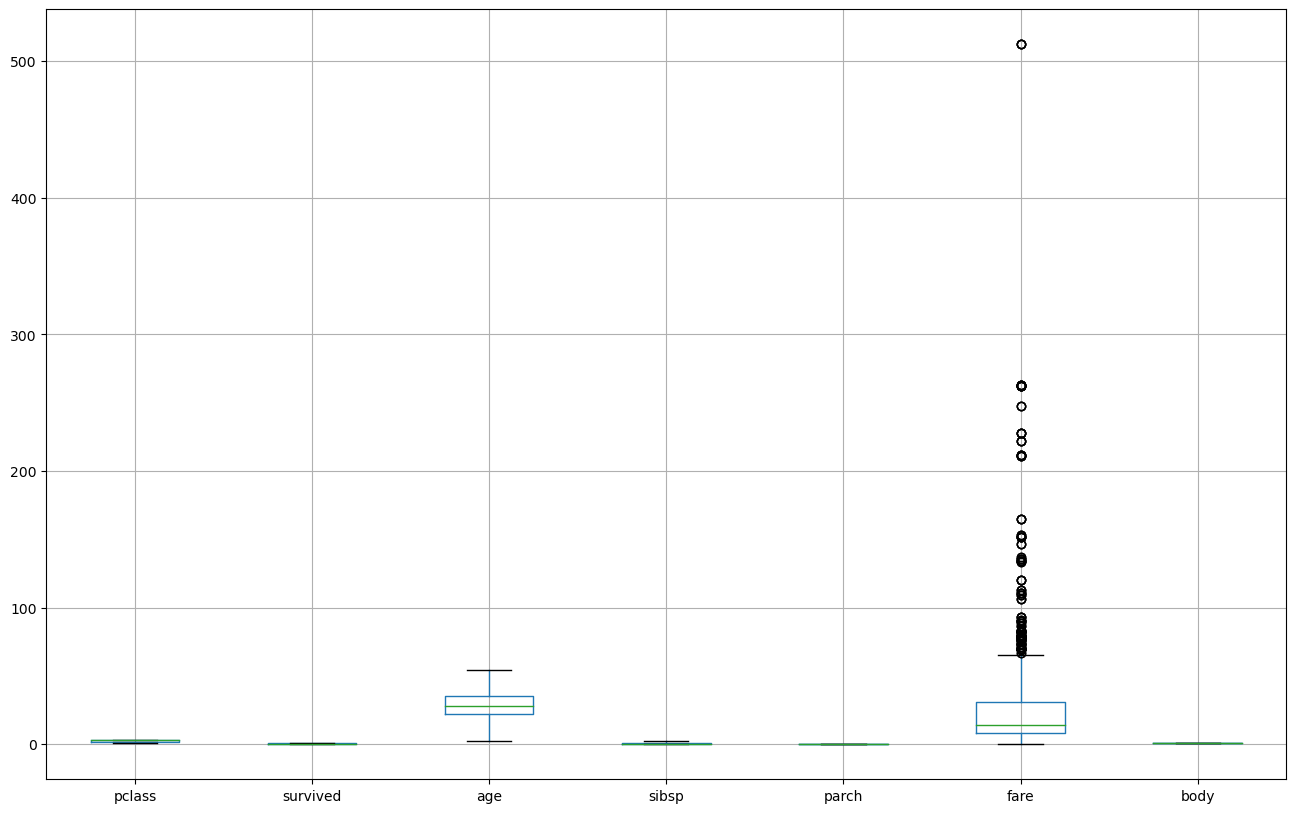

In [30]:
plt.figure(figsize=(16,10))
dp.boxplot()
plt.show()

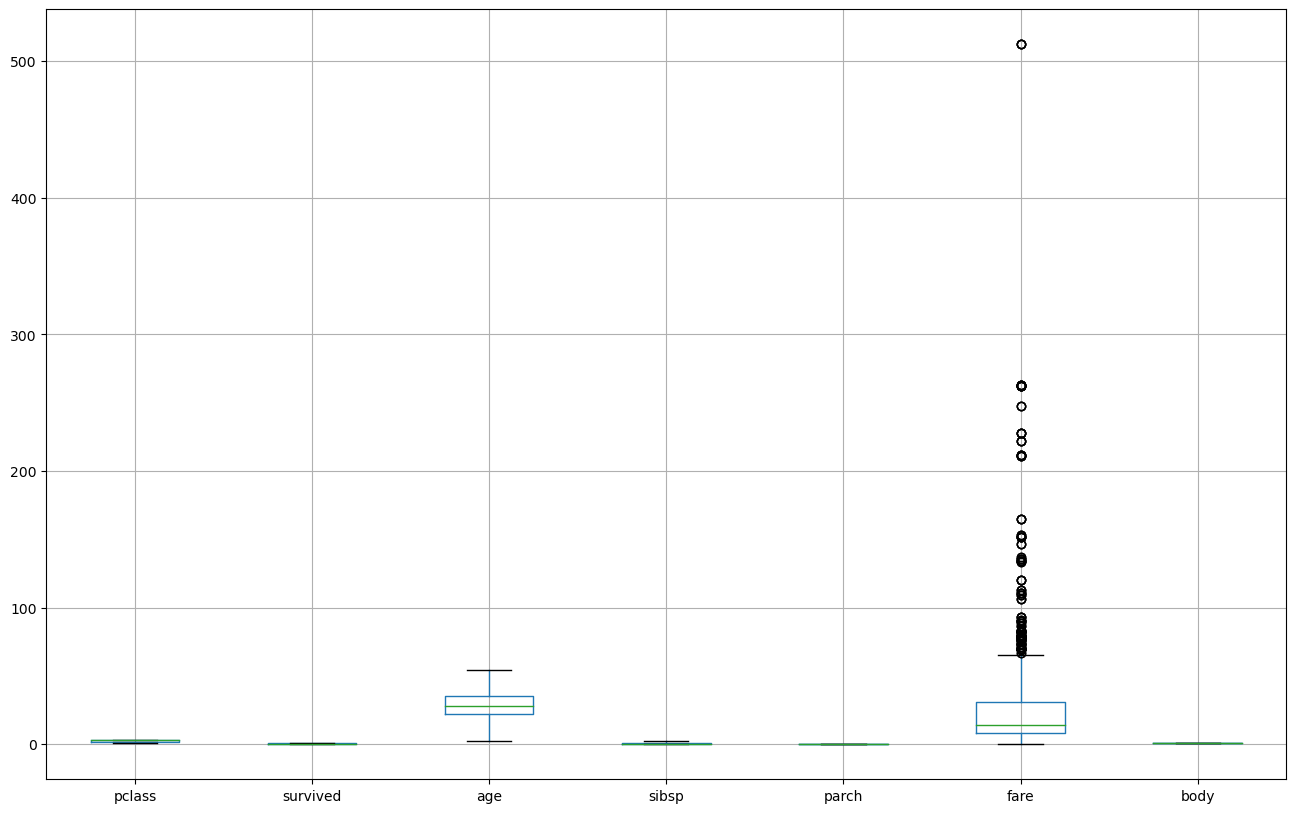

In [38]:
plt.figure(figsize=(16,10))
df.boxplot()
plt.show()

###### Suppression

In [39]:
# Calculer les quartiles
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les valeurs acceptables
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

# Supprimer les valeurs aberrantes
data_cleaned = data[(df['fare'] >= borne_inf) & (df['fare'] <= borne_sup)]

# Réindexer le dataframe si nécessaire
data_cleaned.reset_index(drop=True, inplace=True)

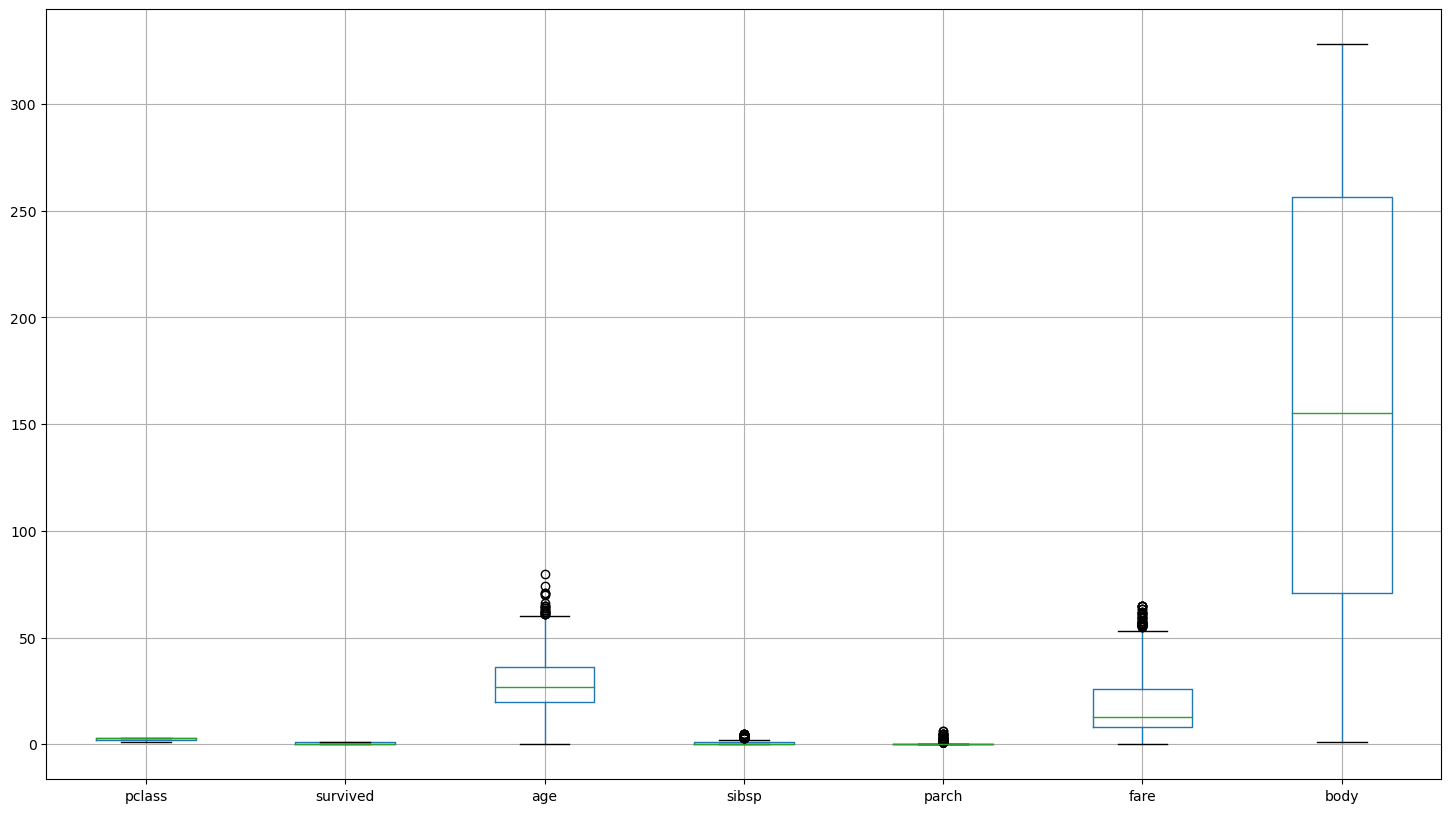

In [41]:
plt.figure(figsize=(18,10))
data_cleaned.boxplot()
plt.show()

In [44]:
def impute_outliers(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [45]:
for feature in features:
    impute_outliers(data_cleaned, feature)

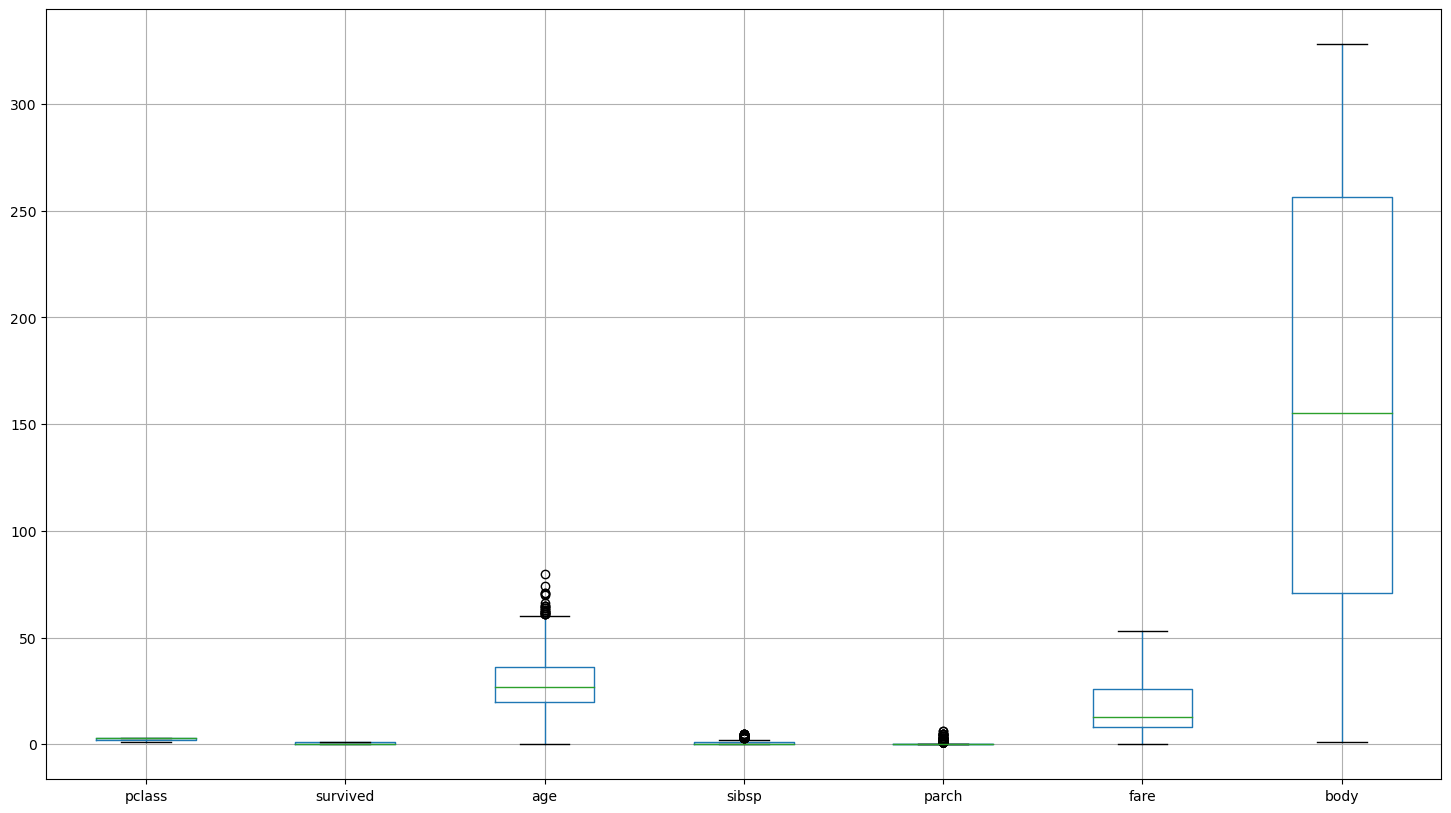

In [51]:
plt.figure(figsize=(18,10))
data_cleaned.boxplot()
plt.show()

0       211.3375
1       151.5500
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.4542
1305     14.4542
1306      7.2250
1307      7.2250
1308      7.8750
Name: fare, Length: 1309, dtype: float64